# Which Asset Class is safe againts unexpected inflation?

In [161]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd

## 1. Prepare Expected Inflation Rates

In [162]:
tbond = pd.read_csv('10y_tbond.csv')

In [163]:
tbond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      617 non-null    object 
 1   Price     617 non-null    float64
 2   Open      617 non-null    float64
 3   High      617 non-null    float64
 4   Low       617 non-null    float64
 5   Change %  617 non-null    object 
dtypes: float64(4), object(2)
memory usage: 29.0+ KB


In [164]:
def adjust_date_index(df):
    def repl(m):
        return "20{}".format(m.group(0))
    
    df.loc[df['Date'].str[-2:].astype(int) <= 21, 'Date'] = \
        df[df['Date'].str[-2:].astype(int) <= 21]['Date'].str.replace(r"..$",repl)
    
    def repl(m):
        return "19{}".format(m.group(0))
    
    df.loc[df['Date'].str[-2:].astype(int) > 21, 'Date'] = \
        df[df['Date'].str[-2:].astype(int) > 21]['Date'].str.replace(r"..$",repl)
    
    df['Date'] = pd.to_datetime(df['Date'], format="%b %Y") + MonthEnd(1)
    return df

In [165]:
tbond_cleaned = tbond.copy()

In [166]:
tbond_cleaned = adjust_date_index(tbond_cleaned)

In [167]:
tbond_cleaned

,Date,Price,Open,High,Low,Change %
0,2021-06-30,1.443,1.610,1.637,1.430,-8.69%
1,2021-05-31,1.581,1.631,1.707,1.469,-2.78%
2,2021-04-30,1.626,1.737,1.753,1.528,-6.77%
3,2021-03-31,1.744,1.395,1.776,1.383,23.99%
4,2021-02-28,1.407,1.071,1.614,1.060,31.38%
...,...,...,...,...,...,...
612,1970-06-30,7.840,7.840,7.840,7.840,-0.88%
613,1970-05-31,7.910,7.910,7.910,7.910,7.04%
614,1970-04-30,7.390,7.390,7.390,7.390,4.53%
615,1970-03-31,7.070,7.070,7.070,7.070,-2.35%


In [177]:
tips = pd.read_csv('10y_tips.csv')
tips_cleaned = tips.copy()

In [178]:
tips_cleaned = adjust_date_index(tips_cleaned)

In [180]:
tips_cleaned

,Date,Price,Open,High,Low,Change %
0,2021-06-30,110.59,110.03,110.03,110.03,0.66%
1,2021-05-31,109.87,109.59,109.59,109.59,0.69%
2,2021-04-30,109.12,108.12,108.12,108.12,1.42%
3,2021-03-31,107.59,108.78,108.78,108.78,-1.16%
4,2021-02-28,108.84,111.89,111.89,111.89,-2.93%
...,...,...,...,...,...,...
131,2010-07-31,102.64,102.64,102.64,102.64,0.11%
132,2010-06-30,102.53,102.53,102.53,102.53,1.77%
133,2010-05-31,100.75,100.75,100.75,100.75,-0.22%
134,2010-04-30,100.97,100.97,100.97,100.97,3.01%


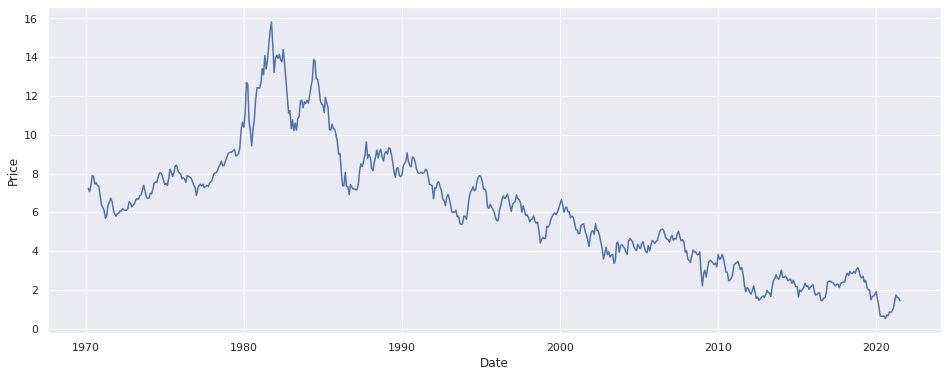

In [174]:
plt.figure(figsize=(16, 6))
sns.set_theme()
sns.lineplot(data=tbond_cleaned, x="Date", y="Price")

In [176]:
gold = pd.read_excel('gold.xlsx',
                     sheet_name="Monthly_Average",
                     index_col=3,
                     skiprows=list(range(0,8)),
                     engine="openpyxl")
gold = gold.iloc[:, 3:4]

In [19]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1764 entries, 1978-12-31 to NaT
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   US dollar  510 non-null    float64
dtypes: float64(1)
memory usage: 27.6 KB


In [25]:
gold.index

DatetimeIndex(['1978-12-31', '1979-01-31', '1979-02-28', '1979-03-30',
               '1979-04-30', '1979-05-31', '1979-06-29', '1979-07-31',
               '1979-08-31', '1979-09-28',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='Name', length=1764, freq=None)